#  Blues Clues TIPS Analysis

### This is a notebook for analysis of the TIPS dataset provided by the Institute for Advanced Analytics

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
nltk.download('punkt')
nltk.download('stopwords')
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.stem import SnowballStemmer
from operator import itemgetter
# Remove start and end_tokens when looking at distribution

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\edbak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\edbak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
df = pd.read_csv('MSA2024_TIPS_Data.csv')
df.head()

,TIP #1,TIP #2,TIP #3,Anything else you want to mention? [this can be more TIPS if you are overflowing with advice],Year
0,Keep in mind before the class: where have we b...,Remember to clean the kitchen,NaN,NaN,2023
1,prioritize life outside of the IAA so you don'...,NaN,start the data visualization project way earli...,NaN,2023
2,"When they say ""trust the process,"" you actuall...",you are expected to maintain an A/B grade poin...,"Fall 2 is the most stressful, fast-paced semes...",Don't worry about the TIPS project so much. It...,2023
3,when you are interested in an analytic group ...,If you are coming into the program after havin...,"Depending on your cohort, you may or may not m...","Put your mental health and relationships, abov...",2023
4,Take good care of yourself. Getting adequate s...,"Don't be shy to ask the faculty, classmates, T...",Hang out with your classmates during lunch or ...,It's useful to have prior knowledge of Python ...,2023


# Text pre-processing

In [28]:
# Text pre-processing, remove stop words etc, lower case
# Plot Unigram, bigram, trigram frequencies for each year
# IMPORTANT: A 'token' is just a word. We call them tokens because not every item in a sentence is an english word... i.e.
# numbers, symbols, etc. When I split things into tokens, I am just breaking up the bigger string

# data structure looks like this
# years = {2016->2023}
# each year is list of lists containing the text tokens
# Replace the NaNs with empty string
df=df.replace(to_replace = np.nan, value = " ") 

In [29]:
# intializing our years dictionary with empty lists that will contain sublists of TIPS as tokens
years = {2016: [], 2017: [], 2018: [], 2019: [], 2020: [], 2021: [], 2022: [], 2023: []}

# for every row
for i in range(len(df)):
    # and every column excluding the years
    for j in range(len(df.columns) - 1):
        # get the tips as lower case tokens
        tips = nltk.word_tokenize(df.iloc[i,j].lower())
        # remove stopwords and punctuation before adding
        # NOTE: consider not removing stopwords, as it doesn't read very well, see output below
        stop_words = stopwords.words('english')
        clean_tips = [word for word in tips if word not in stop_words and word not in string.punctuation and word != "n't" and word != "'re" and word != "'s"]
        # add the tips to the dictionary, only if non-empty
        if(clean_tips != []):
            years[df.iloc[i,4]].append(clean_tips)

# print(years)

In [30]:
def flatten(l):
    return [item for sublist in l for item in sublist]

### Vocabulary search

In [42]:
# combining all years 
VOCAB = sum(years.values(), [])
VOCAB = flatten(VOCAB)

STEM_VOCAB = []
TIME_VOCAB = []
PEOPLE_VOCAB = []
for word in VOCAB:
    STEM_VOCAB.append((nltk.PorterStemmer().stem(word)))

time_words = ['calendar', 'plan', 'organize', 'schedule', 'management', 'time']
for word in time_words:
    TIME_VOCAB.append((nltk.PorterStemmer().stem(word)))

people_words = ['people','network','interview','classmates','coach','faculty','teachers','freinds','teams']
for word in people_words:
    PEOPLE_VOCAB.append((nltk.PorterStemmer().stem(word)))

In [43]:
occurences_time = {}
occurences_people = {}

for word in STEM_VOCAB:
    if word in TIME_VOCAB:
        try:
            occurences_time[word] += 1
        except:
            occurences_time[word] = 1
            
for word in STEM_VOCAB:
    if word in PEOPLE_VOCAB:
        try:
            occurences_people[word] += 1
        except:
            occurences_people[word] = 1

print(occurences_time)
print(occurences_people)

{'time': 407, 'manag': 33, 'schedul': 34, 'plan': 25, 'organ': 27, 'calendar': 32}
{'network': 93, 'interview': 217, 'team': 175, 'classmat': 148, 'coach': 32, 'peopl': 183, 'faculti': 97, 'teacher': 3}


In [40]:
# frequency distribution of all words
unigram_map_overall = {}

# get distribution of unigrams
fdist = FreqDist(VOCAB)

# total number of unigrams
total_unigrams = fdist.N()

# convert counts to probablities
for unigram, frequency in fdist.items():
    prob = frequency / total_unigrams
    # add probs to bigram map
    unigram_map_overall[unigram] = prob  

In [36]:
for year, word_freqs in unigram_map_overall.items():
    top_10 = dict(sorted(unigram_map_overall.items(), key=itemgetter(1), reverse=True)[:10])
print(top_10)

{'time': 0.016604789686263312, 'get': 0.015503243441720044, 'program': 0.013504140997919302, 'work': 0.012361796744318877, 'make': 0.011831422626575824, 'learn': 0.011586634572232876, 'take': 0.010362694300518135, 'help': 0.010077108237118028, 'interview': 0.008853167965403289, 'go': 0.008526783892946024}


# Getting the unigrams
#### (uncomment the print at the end to see the map)

In [5]:
# Obtain Unigram counts
unigram_map = {2016: {}, 2017: {}, 2018: {}, 2019: {}, 2020: {}, 2021: {}, 2022: {}, 2023: {}}

# go through every year
for year in years:
    
    # get unigrams
    unigrams = [word for tips in years[year] for word in tips]
    
    # get distribution of unigrams
    fdist = FreqDist(unigrams)

    # total number of unigrams
    total_unigrams = fdist.N()

    # convert counts to probablities
    for unigram, frequency in fdist.items():
        prob = frequency / total_unigrams
        # add probs to bigram map
        unigram_map[year][unigram] = prob
        
# now we have a unigram probability distribution for every word, for every year, saved in this unigram map!
# print(unigram_map)

### Creating distribution graph

In [7]:
for year, word_freqs in unigram_map.items():
    sorted_freqs = sorted(word_freqs.items(), key=lambda x: x[1], reverse=True)
    top_10_words = [word for word, freq in sorted_freqs[:10]]
    print(f"Year {year}: Top 10 words by frequency are {top_10_words}")

Year 2016: Top 10 words by frequency are ['get', 'time', 'learn', 'take', 'make', 'program', 'job', 'work', 'help', 'much']
Year 2017: Top 10 words by frequency are ['time', 'get', 'work', 'program', 'make', 'team', 'take', 'learn', 'try', 'people']
Year 2018: Top 10 words by frequency are ['time', 'get', 'help', 'learn', 'make', 'team', 'people', 'take', 'try', 'great']
Year 2019: Top 10 words by frequency are ['get', 'program', 'work', 'take', 'learn', 'interviews', 'time', 'good', 'practicum', 'know']
Year 2020: Top 10 words by frequency are ['time', 'get', 'program', 'people', 'make', 'work', 'take', 'know', 'classmates', 'things']
Year 2021: Top 10 words by frequency are ['program', 'get', 'time', 'make', 'take', 'work', 'help', '’', 'learn', 'people']
Year 2022: Top 10 words by frequency are ['time', 'get', 'program', 'take', 'make', 'work', 'go', 'job', 'help', 'know']
Year 2023: Top 10 words by frequency are ['time', 'program', 'make', 'get', 'work', 'people', 'friends', 'fall'

In [8]:
# insert start and end tokens to know where one tip ends and the next begins
for year in years:
    for tips in years[year]:
        tips.insert(0,"start_token")
        tips.append("end_token")

# Getting the bigrams
#### (uncomment the print at the end to see the map)

In [10]:
# Obtain Bigram counts

# creating the bigram map
bigram_map = {2016: {}, 2017: {}, 2018: {}, 2019: {}, 2020: {}, 2021: {}, 2022: {}, 2023: {}}

# go through every year
for year in years:
    
    # and flatten the arrays
    words = [word for tips in years[year] for word in tips]
    
    # get bigrams
    bigrams = list(nltk.bigrams(words))
    
    # get distribution of bigrams
    fdist = FreqDist(bigrams)

    # total number of bigrams
    total_bigrams = fdist.N()

    # convert counts to probablities
    for bigram, frequency in fdist.items():
        prob = frequency / total_bigrams
        # add probs to bigram map
        bigram_map[year][bigram] = prob

# now we have a bigram probability distribution for every word, for every year, saved in this bigram map
    
# print(bigram_map)

In [11]:
for year, word_freqs in bigram_map.items():
    sorted_freqs = sorted(word_freqs.items(), key=lambda x: x[1], reverse=True)
    top_10_words = [word for word, freq in sorted_freqs[:15]]
    print(f"Year {year}: Top 10 words by frequency are {top_10_words}")

Year 2016: Top 10 words by frequency are [('end_token', 'start_token'), ('start_token', 'take'), ('start_token', 'learn'), ('program', 'end_token'), ('make', 'sure'), ('take', 'time'), ('fall', 'semester'), ('job', 'search'), ('start_token', 'make'), ('start_token', 'keep'), ('start_token', 'try'), ('start_token', 'trust'), ('r', 'python'), ('get', 'know'), ('start_token', 'apply')]
Year 2017: Top 10 words by frequency are [('end_token', 'start_token'), ('start_token', 'take'), ('make', 'sure'), ('start_token', 'try'), ('get', 'know'), ('take', 'time'), ('program', 'end_token'), ('job', 'search'), ('work', 'end_token'), ('try', 'get'), ('start_token', 'make'), ('take', 'advantage'), ('interview', 'season'), ('process', 'end_token'), ('start_token', 'start')]
Year 2018: Top 10 words by frequency are [('end_token', 'start_token'), ('trust', 'process'), ('practicum', 'team'), ('start_token', 'trust'), ('start_token', 'get'), ('start_token', 'take'), ('get', 'know'), ('open', 'source'), ('

# Getting the trigrams
#### (uncomment the print at the end to see the map)

In [12]:
# Obtain Trigram counts

# creating the trigram map
trigram_map = {2016: {}, 2017: {}, 2018: {}, 2019: {}, 2020: {}, 2021: {}, 2022: {}, 2023: {}}

# go through every year
for year in years:
    
    # and flatten the arrays
    words = [word for tips in years[year] for word in tips]
    
    # get trigrams
    trigrams = list(nltk.trigrams(words))
    
    # get distribution of trigrams
    fdist = FreqDist(trigrams)

    # total number of trigrams
    total_trigrams = fdist.N()

    # convert counts to probablities
    for trigram, frequency in fdist.items():
        prob = frequency / total_trigrams
        # add probs to trigram map
        trigram_map[year][trigram] = prob

# now we have a trigram probability distribution for every word, for every year, saved in this trigram map!
# print(trigram_map)


## Frequency Graphs

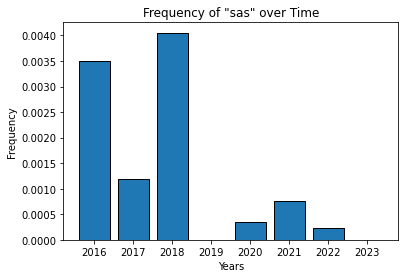

In [13]:
# Extract the frequencies of "sas" for each year
sas_frequencies = [tip_data.get('sas', 0) for tip_data in unigram_map.values()]
x = list(years.keys())
# Create a bar graph
plt.bar(x, sas_frequencies, edgecolor='black')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title('Frequency of "sas" over Time')
plt.show()

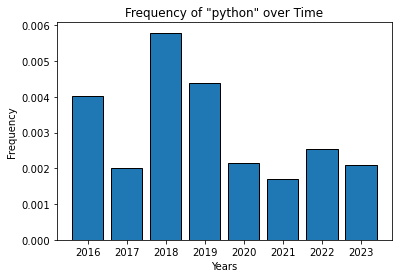

In [14]:
# Extract the frequencies of "python" for each year
py_frequencies = [tip_data.get('python', 0) for tip_data in unigram_map.values()]
x = list(years.keys())
# Create a bar graph
plt.bar(x, py_frequencies, edgecolor='black')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title('Frequency of "python" over Time')
plt.show()

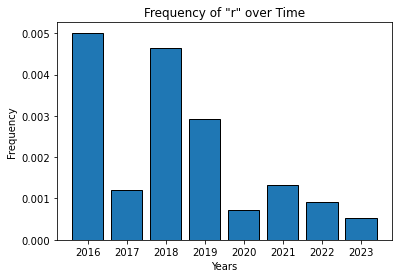

In [15]:
# Extract the frequencies of "r" for each year
r_frequencies = [tip_data.get('r', 0) for tip_data in unigram_map.values()]
x = list(years.keys())
# Create a bar graph
plt.bar(x, r_frequencies, edgecolor='black')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title('Frequency of "r" over Time')
plt.show()

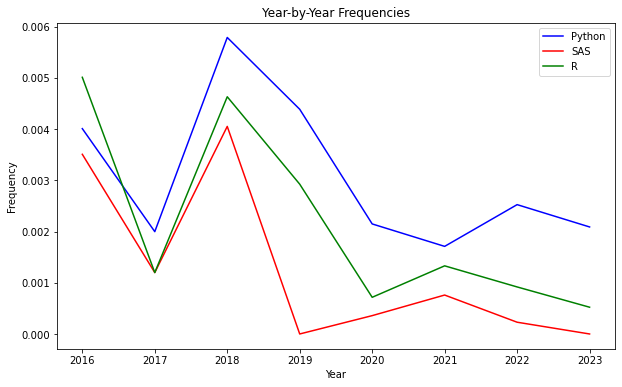

In [17]:
# Create the line graph
years = range(2016, 2024)
plt.figure(figsize=(10, 6))  # Adjusts the figure size

plt.plot(years, py_frequencies, color='blue', label='Python')
plt.plot(years, sas_frequencies, color='red', label='SAS')
plt.plot(years, r_frequencies, color='green', label='R')

# Set chart title and labels
plt.title('Year-by-Year Frequencies')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend()

# Display the chart
plt.show()